In [406]:
import pandas as pd
import numpy as np

In [407]:
# Reading DataSet
dataset=pd.read_csv("E:\\Internship\\train.csv")
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [408]:
#Employee_Id is not going influence the promotion(not relevant)
dataset=dataset.drop(columns='employee_id',axis=1)

In [409]:
dataset.shape

(54808, 13)

In [410]:
#Keeping Copy of datset for future reference
mainData=dataset.copy()

In [411]:
# Percentage of missing values for each column  in Dataset
(dataset.isnull().mean())*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [412]:
dataset.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [413]:
import numpy as np


In [414]:
#checking randomness of missing value with the target variables
def randomness_missingValue(df,variable):
    dataset[variable+'_null']=np.where(dataset[variable].isnull(),1,0)
    ##find the percentage of null values
    dataset[variable+'_null'].mean() 
    return dataset.groupby(['is_promoted'])[variable+'_null'].mean()


    

In [415]:
randomness_missingValue(dataset,'previous_year_rating')

is_promoted
0    0.075489
1    0.072622
Name: previous_year_rating_null, dtype: float64

In [416]:
randomness_missingValue(dataset,'education')

is_promoted
0    0.045612
1    0.026135
Name: education_null, dtype: float64

In [417]:
#Droping reference col created for checking relationship between  missing values with Target variable
dataset.drop(columns=['previous_year_rating_null','education_null'],axis=1,inplace=True)

In [418]:
dataset.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [419]:
dataset.shape

(54808, 13)

<AxesSubplot:>

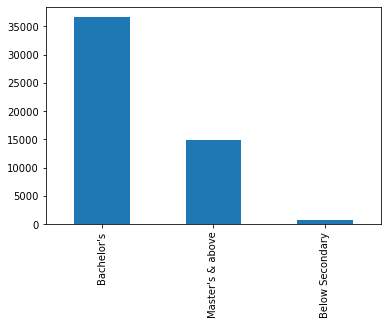

In [420]:
dataset['education'].value_counts().plot(kind='bar')

In [421]:
#Simply taking mode for education col won't help as education col data is imbalancly distributed
data=[i for i in dataset.columns if i not in ['department','region','previous_year_rating']]
dataForEdu=dataset[data]

    

In [422]:
dataForEdu.head()

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,sourcing,1,35,8,1,0,49,0
1,Bachelor's,m,other,1,30,4,0,0,60,0
2,Bachelor's,m,sourcing,1,34,7,0,0,50,0
3,Bachelor's,m,other,2,39,10,0,0,50,0
4,Bachelor's,m,other,1,45,2,0,0,73,0


<AxesSubplot:>

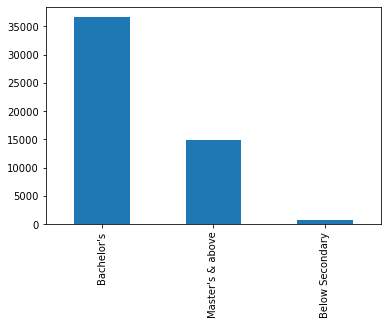

In [423]:
# Imbalanced Education Category for taking MOde as filling NAN values
dataForEdu['education'].value_counts().plot(kind='bar')


In [424]:
#Getting index of NAN Rows
nanIndex=dataForEdu[dataForEdu['education'].isnull()].index.tolist()

In [425]:
#Getting data of NAN Rows
testData=dataForEdu[dataForEdu.index.isin(nanIndex)]
testData

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,NaN,m,sourcing,1,30,1,0,0,77,0
21,NaN,m,sourcing,1,41,11,0,0,57,0
32,NaN,f,sourcing,1,24,2,0,0,48,0
43,NaN,m,other,3,24,2,0,0,48,0
82,NaN,m,sourcing,2,25,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...
54692,NaN,f,sourcing,1,35,7,0,0,53,0
54717,NaN,m,sourcing,1,32,4,0,0,86,0
54729,NaN,f,other,1,28,2,0,0,53,0
54742,NaN,m,other,1,28,3,0,0,47,0


In [426]:
totalIndex=dataForEdu.index.tolist()

In [427]:
#Getting Index of rows which does not have NAN value
notNullIndex=[i for i in totalIndex if i not in nanIndex ]


In [428]:
#Getting all data which have not any missing values
trainData=dataForEdu[dataForEdu.index.isin(notNullIndex)]
trainData

,education,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,sourcing,1,35,8,1,0,49,0
1,Bachelor's,m,other,1,30,4,0,0,60,0
2,Bachelor's,m,sourcing,1,34,7,0,0,50,0
3,Bachelor's,m,other,2,39,10,0,0,50,0
4,Bachelor's,m,other,1,45,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54802,Bachelor's,m,other,2,31,2,0,0,49,0
54803,Bachelor's,m,sourcing,1,48,17,0,0,78,0
54804,Master's & above,f,other,1,37,6,0,0,56,0
54805,Bachelor's,m,other,1,27,3,1,0,79,0


In [429]:
X_train=trainData.iloc[:,1:]
X_train.head()

,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,f,sourcing,1,35,8,1,0,49,0
1,m,other,1,30,4,0,0,60,0
2,m,sourcing,1,34,7,0,0,50,0
3,m,other,2,39,10,0,0,50,0
4,m,other,1,45,2,0,0,73,0


In [430]:
y_train=trainData.iloc[:,0]
y_train.head()

0    Master's & above
1          Bachelor's
2          Bachelor's
3          Bachelor's
4          Bachelor's
Name: education, dtype: object

In [431]:
y_train.unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [432]:
y_train=y_train.replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [433]:
X_train=pd.get_dummies(X_train)

In [434]:
# K-Nearest Neighbor(KNN) for predicting NAN values for Education column
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)


In [435]:
testData=testData.iloc[:,1:]
testData

,gender,recruitment_channel,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,m,sourcing,1,30,1,0,0,77,0
21,m,sourcing,1,41,11,0,0,57,0
32,f,sourcing,1,24,2,0,0,48,0
43,m,other,3,24,2,0,0,48,0
82,m,sourcing,2,25,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...
54692,f,sourcing,1,35,7,0,0,53,0
54717,m,sourcing,1,32,4,0,0,86,0
54729,f,other,1,28,2,0,0,53,0
54742,m,other,1,28,3,0,0,47,0


In [436]:
testData1=pd.get_dummies(testData)

In [437]:
testDataPred=KNN.predict(testData1).tolist()

In [438]:
#Storing all NAN predicted Data from KNN Algo
df = pd.DataFrame(testDataPred, columns = ["education"])
df

,education
0,2
1,2
2,2
3,2
4,2
...,...
2404,3
2405,2
2406,2
2407,2


In [439]:
#Converting encoded Value to original Data
df['education']=df['education'].replace({3:"Master's & above",2:"Bachelor's",1:'Below Secondary'})
df

,education
0,Bachelor's
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
2404,Master's & above
2405,Bachelor's
2406,Bachelor's
2407,Bachelor's


In [440]:
print(df.shape)
print(testData.shape)

(2409, 1)
(2409, 9)


In [441]:
# CAllung MAin Data which we have copied
mainData

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [442]:
nanDataForFilter=mainData[mainData.index.isin(nanIndex)]
nanDataForFilter


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [443]:
nanDataForFilter=nanDataForFilter.drop(columns='education',axis=1)


In [444]:
nanDataForFilter

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,m,sourcing,1,30,NaN,1,0,0,77,0
21,Operations,region_15,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54692,Sales & Marketing,region_2,f,sourcing,1,35,3.0,7,0,0,53,0
54717,Analytics,region_2,m,sourcing,1,32,3.0,4,0,0,86,0
54729,HR,region_2,f,other,1,28,3.0,2,0,0,53,0
54742,Sales & Marketing,region_31,m,other,1,28,4.0,3,0,0,47,0


In [445]:
#Reseting Index for Adding the NAN Treated data to Not Null Data
nanDataForFilter=nanDataForFilter.reset_index()

In [446]:
df

,education
0,Bachelor's
1,Bachelor's
2,Bachelor's
3,Bachelor's
4,Bachelor's
...,...
2404,Master's & above
2405,Bachelor's
2406,Bachelor's
2407,Bachelor's


In [447]:
NanValueData=pd.concat([df, nanDataForFilter], axis=1)
NanValueData=NanValueData.drop(columns='index',axis=1)

In [448]:
NotNullData=mainData[mainData.index.isin(notNullIndex)]

In [449]:
print(NanValueData.shape)
print(NotNullData.shape)

(2409, 13)
(52399, 13)


In [450]:
NanValueData.head()

,education,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Bachelor's,Technology,region_23,m,sourcing,1,30,NaN,1,0,0,77,0
1,Bachelor's,Operations,region_15,m,sourcing,1,41,4.0,11,0,0,57,0
2,Bachelor's,Sales & Marketing,region_7,f,sourcing,1,24,1.0,2,0,0,48,0
3,Bachelor's,Sales & Marketing,region_2,m,other,3,24,2.0,2,0,0,48,0
4,Bachelor's,Sales & Marketing,region_2,m,sourcing,2,25,3.0,2,0,0,53,0


In [451]:
NanValueData=NanValueData[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']]

In [452]:
NanValueData.head()
NanValueData.shape

(2409, 13)

In [453]:
NotNullData.head()
NotNullData.shape

(52399, 13)

In [454]:
#Adding The NAN treated Data with Not Null Data
DataSet=NotNullData.append(NanValueData,ignore_index=True)
DataSet.shape

(54808, 13)

In [455]:
DataSet.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

<AxesSubplot:>

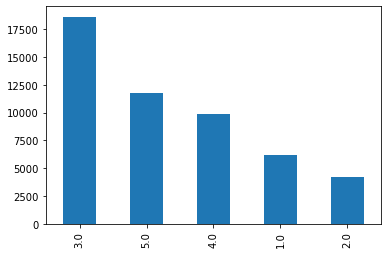

In [456]:
#Missing Value treatment for previous_year_rating
DataSet['previous_year_rating'].value_counts().plot(kind='bar')

In [457]:
#As per looking into distribution for frequency in previous_year_rating var 3.0 , 5.0, 4.0 is frequently given to employees.Choosing one of these using mode could create biasness.
# So Adding A separate col for weightage given to NAN values would be help full

DataSet['previous_year_rating_Var']=np.where(DataSet['previous_year_rating'].isnull(),1,0)


In [458]:
#But in education variable looking into we can impute with the mode value as Bachelor's is quite dominant in frequency count
def impute_mode(df,variable):
    frequent=DataSet[variable].mode()[0]
    DataSet[variable].fillna(frequent,inplace=True)


In [459]:
DataSet.isnull().sum()

department                     0
region                         0
education                      0
gender                         0
recruitment_channel            0
no_of_trainings                0
age                            0
previous_year_rating        4124
length_of_service              0
KPIs_met >80%                  0
awards_won?                    0
avg_training_score             0
is_promoted                    0
previous_year_rating_Var       0
dtype: int64

In [460]:
variable=['previous_year_rating']
for var in variable:
    impute_mode(DataSet,var)

In [461]:
DataSet.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted                 0
previous_year_rating_Var    0
dtype: int64

In [462]:
DataSet['region'].nunique()

34

## Exploratory Data Analysis

Text(0, 0.5, 'Frequency')

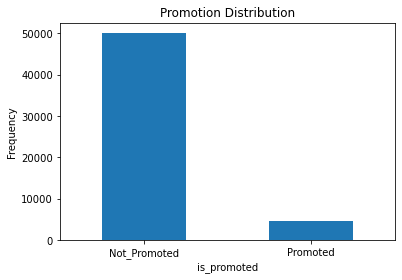

In [463]:
#Distribution of Target VAriabel
from matplotlib import pyplot as plt
count_classes = pd.value_counts(DataSet['is_promoted'], sort = True)
LABELS=['Not_Promoted','Promoted',]

count_classes.plot(kind = 'bar', rot=0)

plt.title("Promotion Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("is_promoted")

plt.ylabel("Frequency")

In [464]:
promoted=dataset[DataSet['is_promoted']==1]
NotPromoted=dataset[DataSet['is_promoted']==0]

In [465]:
print(promoted.shape)
print(NotPromoted.shape)

(4668, 13)
(50140, 13)


In [466]:
df=DataSet.copy()
df.shape

(54808, 14)

In [467]:
#Create independent and Dependent Features
columns = DataSet.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["is_promoted"]]
# Store the variable we are predicting 
target = "is_promoted"
# Define a random state 
state = np.random.RandomState(42)
X = DataSet[columns]
y = DataSet[target]
# Print the shapes of X & Y
print(X.shape)
print(y.shape)

(54808, 13)
(54808,)


In [468]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.over_sampling import RandomOverSampler

overSam = RandomOverSampler()
X_bal,y_bal=overSam.fit_sample(X,y)

In [469]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_bal)))

Original dataset shape Counter({0: 50140, 1: 4668})
Resampled dataset shape Counter({0: 50140, 1: 50140})


In [470]:
print(X.shape)
print(y.shape)
print(X_bal.shape)
print(y_bal.shape)

(54808, 13)
(54808,)
(100280, 13)
(100280,)


In [471]:
X_bal.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [472]:
y_bal=y_bal.to_frame()

In [473]:
data=X_bal.join(y_bal)

In [474]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [475]:
data.shape

(100280, 14)

## variable visualization And Outlier Treatment

In [476]:
data.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
previous_year_rating_Var    0
is_promoted                 0
dtype: int64

In [477]:
data.nunique()

department                   9
region                      34
education                    3
gender                       2
recruitment_channel          3
no_of_trainings             10
age                         41
previous_year_rating         5
length_of_service           35
KPIs_met >80%                2
awards_won?                  2
avg_training_score          61
previous_year_rating_Var     2
is_promoted                  2
dtype: int64

In [478]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'previous_year_rating_Var', 'is_promoted'],
      dtype='object')

<AxesSubplot:>

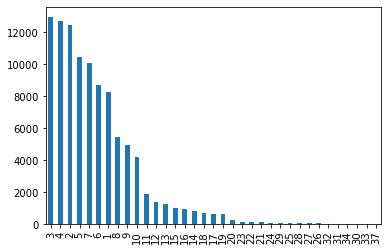

In [479]:
data['length_of_service'].value_counts().plot(kind='bar')

In [480]:
conCol=['age','avg_training_score']
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

In [481]:



def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

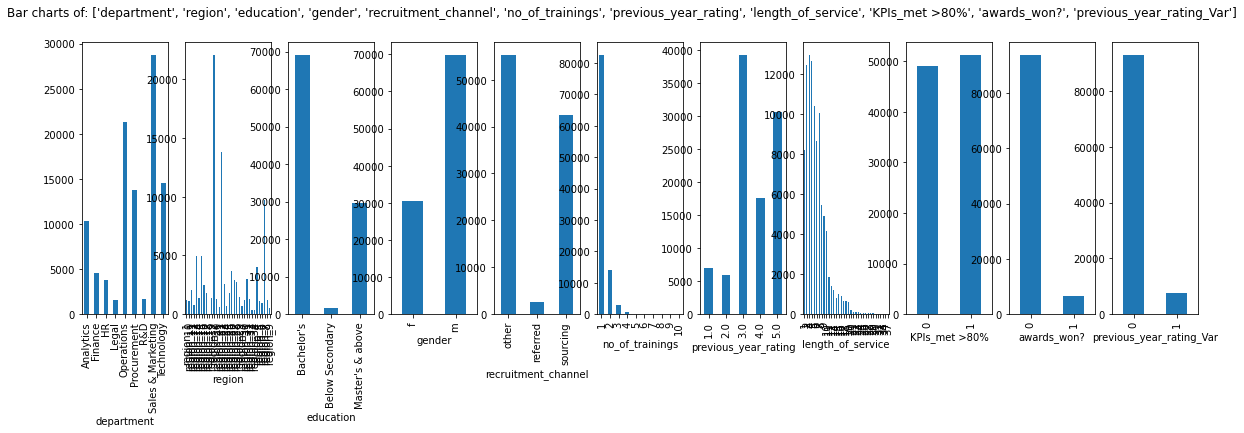

In [482]:
PlotBarCharts(data, catCol)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>]],
      dtype=object)

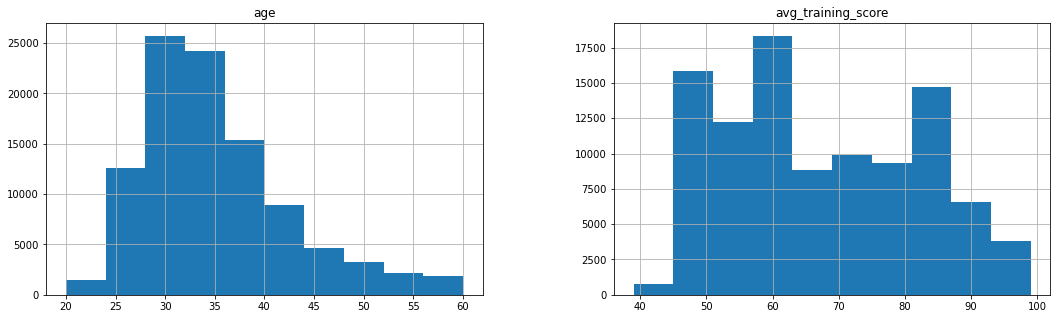

In [483]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
data.hist(['age','avg_training_score'], figsize=(18,5))

## Visualizing outliers for Contineous cols


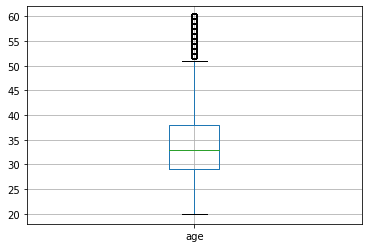

In [484]:
figure=data.boxplot(column="age")

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

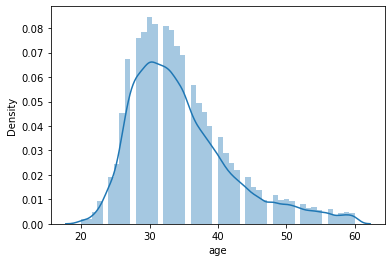

In [485]:
import seaborn as sns
sns.distplot(data['age'])

In [486]:
#As normally distributed
uppper_boundary=data['age'].mean() + 3* data['age'].std()
lower_boundary=data['age'].mean() - 3* data['age'].std()
print(lower_boundary), print(uppper_boundary),print(df['age'].mean())

12.351002015342996
56.87053767352816
34.80391548679025


(None, None, None)

In [487]:
data.loc[data['age']>=56,'age']=56

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

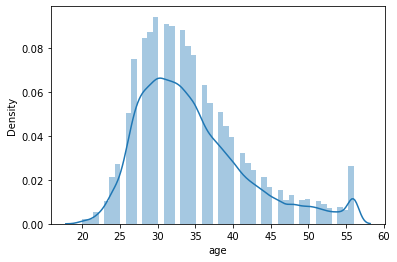

In [488]:
sns.distplot(data['age'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

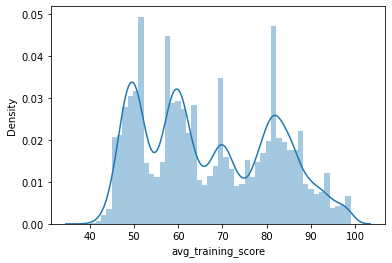

In [489]:
sns.distplot(data['avg_training_score'])

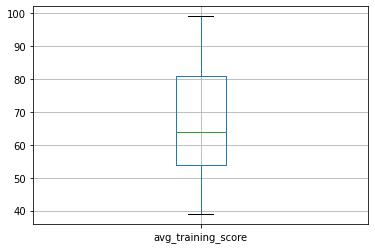

In [490]:
figure=data.boxplot(column="avg_training_score")

In [491]:
# verifing no_of_trainings
data['no_of_trainings'].value_counts()
# may be some important outliers for business scenario

1     82429
2     13916
3      2951
4       734
5       157
6        66
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

## Visualizing relationship of variables with Dependent variable AND Feature selection

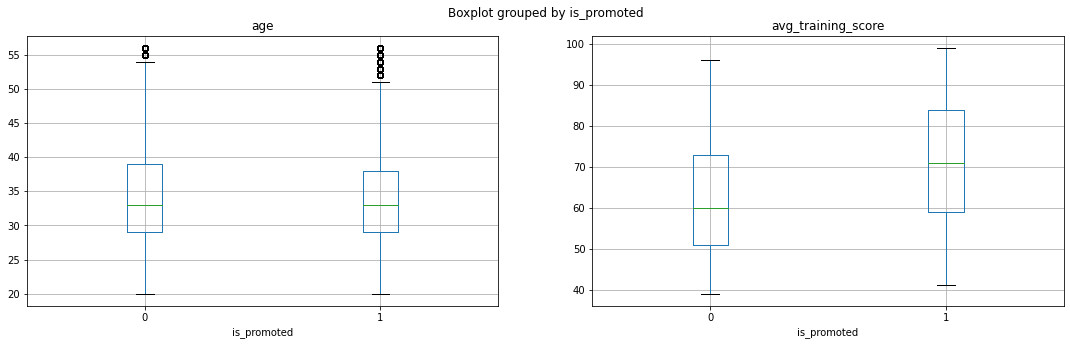

In [492]:
# Box plots for Categorical Target Variable "is_promoted" and continuous predictors
conCol=['age','avg_training_score']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(conCol), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(conCol, range(len(conCol))):
    data.boxplot(column=PredictorCol, by='is_promoted', figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Anova Test

In [493]:
#As per the box plot we see there some variance of avg_tarining_score wrt promotion
# For Confirmation let us do Anova Test
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [494]:
# Calling the function to check which categorical variables are correlated with target
conCol=['age','avg_training_score']
FunctionAnova(inpData=data, TargetVariable='is_promoted', ContinuousPredictorList=conCol)

##### ANOVA Results ##### 

age is correlated with is_promoted | P-Value: 3.626970258975531e-23
avg_training_score is correlated with is_promoted | P-Value: 0.0


['age', 'avg_training_score']

## Relationship between category cols with Promotion and Strength measurent with chi-sqr Test 

In [495]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=data['gender'], columns=data['is_promoted'])
CrossTabResult

is_promoted,0,1
gender,,
f,14845,15697
m,35295,34443


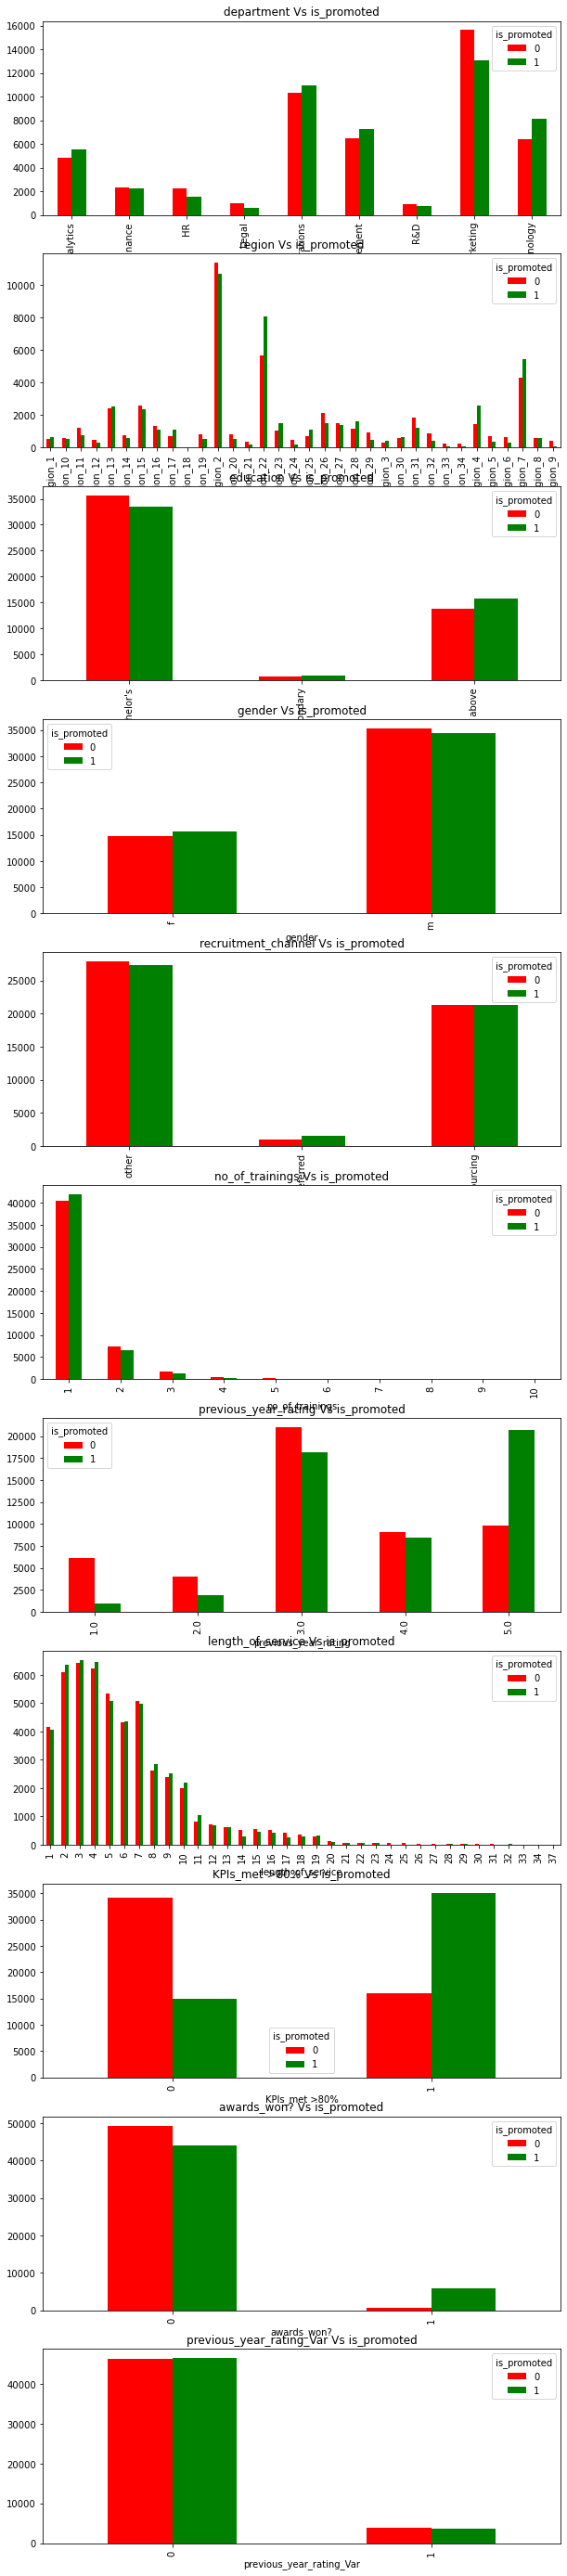

In [496]:
# Visual Inference using Grouped Bar charts
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(catCol), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(catCol, range(len(catCol))):
    CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data['is_promoted'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'is_promoted')

In [497]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [498]:
catCol=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?',
       'previous_year_rating_Var']

# Calling the function
FunctionChisq(inpData=data, 
              TargetVariable='is_promoted',
              CategoricalVariablesList= catCol)

department is correlated with is_promoted | P-Value: 4.5453926945557347e-175
region is correlated with is_promoted | P-Value: 0.0
education is correlated with is_promoted | P-Value: 7.938135332547172e-47
gender is correlated with is_promoted | P-Value: 5.24525322171332e-09
recruitment_channel is correlated with is_promoted | P-Value: 1.2182869903245755e-27
no_of_trainings is correlated with is_promoted | P-Value: 1.5931167476315052e-46
previous_year_rating is correlated with is_promoted | P-Value: 0.0
length_of_service is correlated with is_promoted | P-Value: 3.5667809426828195e-67
KPIs_met >80% is correlated with is_promoted | P-Value: 0.0
awards_won? is correlated with is_promoted | P-Value: 0.0
previous_year_rating_Var is NOT correlated with is_promoted | P-Value: 0.14505684466208146


['department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?']

## Encoding Categorical Features

In [499]:
    data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [500]:
data['department'].value_counts()

Sales & Marketing    28708
Operations           21299
Technology           14510
Procurement          13742
Analytics            10384
Finance               4574
HR                    3792
R&D                   1696
Legal                 1575
Name: department, dtype: int64

In [501]:
#PErcetage promotion in each department
data.groupby(['department'])['is_promoted'].mean()

department
Analytics            0.533898
Finance              0.490599
HR                   0.398207
Legal                0.373968
Operations           0.515235
Procurement          0.530636
R&D                  0.451651
Sales & Marketing    0.455657
Technology           0.560992
Name: is_promoted, dtype: float64

In [502]:
ordinal_labels=data.groupby(['department'])['is_promoted'].mean().sort_values().index
ordinal_labels

Index(['Legal', 'HR', 'R&D', 'Sales & Marketing', 'Finance', 'Operations',
       'Procurement', 'Analytics', 'Technology'],
      dtype='object', name='department')

In [503]:
enumerate(ordinal_labels,0)

In [504]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'Legal': 0,
 'HR': 1,
 'R&D': 2,
 'Sales & Marketing': 3,
 'Finance': 4,
 'Operations': 5,
 'Procurement': 6,
 'Analytics': 7,
 'Technology': 8}

In [505]:
data['department']=data['department'].map(ordinal_labels2)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,3,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,3,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,3,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [506]:
data['region'].value_counts().to_dict()

{'region_2': 22038,
 'region_22': 13781,
 'region_7': 9753,
 'region_13': 4957,
 'region_15': 4937,
 'region_4': 4032,
 'region_26': 3648,
 'region_31': 3035,
 'region_27': 2945,
 'region_28': 2762,
 'region_23': 2556,
 'region_16': 2452,
 'region_11': 2036,
 'region_25': 1803,
 'region_17': 1795,
 'region_29': 1435,
 'region_19': 1390,
 'region_14': 1389,
 'region_32': 1329,
 'region_20': 1321,
 'region_30': 1235,
 'region_8': 1204,
 'region_1': 1189,
 'region_10': 1138,
 'region_5': 1102,
 'region_6': 965,
 'region_12': 792,
 'region_3': 728,
 'region_24': 679,
 'region_21': 581,
 'region_9': 489,
 'region_34': 381,
 'region_33': 366,
 'region_18': 37}

In [507]:
#Count Or Frequency Encoding
region_map=data['region'].value_counts().to_dict()

In [508]:
data['region']=data['region'].map(region_map)
data.head(20)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,3,9753,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,13781,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,3,1390,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,3,2556,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,8,3648,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0
5,7,22038,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0,0
6,5,1321,Bachelor's,f,other,1,31,3.0,5,0,0,59,0,0
7,5,381,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0,0
8,7,1321,Bachelor's,m,other,1,28,4.0,5,0,0,83,0,0
9,3,1189,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0,0


In [509]:
data['education']=data['education'].replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})

In [510]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted
0,3,9753,3,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,5,13781,2,m,other,1,30,5.0,4,0,0,60,0,0
2,3,1390,2,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,3,2556,2,m,other,2,39,1.0,10,0,0,50,0,0
4,8,3648,2,m,other,1,45,3.0,2,0,0,73,0,0


In [511]:
#Avoidng Dumy Trap for applying Drop First
data=pd.get_dummies(data,drop_first=True)

In [512]:
data.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,is_promoted,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,3,9753,3,1,35,5.0,8,1,0,49,0,0,0,0,1
1,5,13781,2,1,30,5.0,4,0,0,60,0,0,1,0,0
2,3,1390,2,1,34,3.0,7,0,0,50,0,0,1,0,1
3,3,2556,2,2,39,1.0,10,0,0,50,0,0,1,0,0
4,8,3648,2,1,45,3.0,2,0,0,73,0,0,1,0,0


In [513]:
data.columns

Index(['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'is_promoted', 'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [514]:
data=data[['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing','is_promoted']]


In [515]:
data.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating_Var,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,3,9753,3,1,35,5.0,8,1,0,49,0,0,0,1,0
1,5,13781,2,1,30,5.0,4,0,0,60,0,1,0,0,0
2,3,1390,2,1,34,3.0,7,0,0,50,0,1,0,1,0
3,3,2556,2,2,39,1.0,10,0,0,50,0,1,0,0,0
4,8,3648,2,1,45,3.0,2,0,0,73,0,1,0,0,0


In [516]:
data.shape

(100280, 15)

# Model Creation

## Machine Learning: Splitting the data into Training and Testing sample

In [517]:
# Printing all the column names for our reference
data.columns

Index(['department', 'region', 'education', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'previous_year_rating_Var',
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'is_promoted'],
      dtype='object')

In [521]:
# Separate Target Variable and Predictor Variables
TargetVariable='is_promoted'
Predictors=[i for i in data.columns if i not in TargetVariable]
print(Predictors)
X=data[Predictors].values
y=data[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

['department', 'region', 'education', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating_Var', 'gender_m', 'recruitment_channel_referred', 'recruitment_channel_sourcing']


array([[3.0000e+00, 9.7530e+03, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.0000e+00, 1.3781e+04, 2.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 1.3900e+03, 2.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [8.0000e+00, 1.3781e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 9.7530e+03, 2.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.0000e+00, 2.9450e+03, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [397]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70196, 14) (30084, 14) (70196,) (30084,)


# Standardization/Normalization of data

In [398]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [399]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70196, 14) (30084, 14) (70196,) (30084,)


### Logistic Regression

In [141]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction_log=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_log))
print(metrics.confusion_matrix(y_test, prediction_log))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_log, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71     15127
           1       0.71      0.73      0.72     14957

    accuracy                           0.72     30084
   macro avg       0.72      0.72      0.72     30084
weighted avg       0.72      0.72      0.72     30084

[[10574  4553]
 [ 3992 10965]]
Accuracy of the model on Testing Sample Data: 0.72

Accuracy values for 10-fold Cross Validation:
 [0.72110242 0.71534028 0.71048573 0.71733302 0.70144057 0.71895006
 0.70997588 0.72368832 0.71463752 0.73582565]

Final Average Accuracy of the model: 0.72


DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15127
           1       0.93      1.00      0.97     14957

    accuracy                           0.96     30084
   macro avg       0.97      0.96      0.96     30084
weighted avg       0.97      0.96      0.96     30084

[[14068  1059]
 [    5 14952]]
Accuracy of the model on Testing Sample Data: 0.96

Accuracy values for 10-fold Cross Validation:
 [0.96755667 0.97045691 0.96905699 0.96865694 0.97335566 0.96985699
 0.97025694 0.97075685 0.97105677 0.97465466]

Final Average Accuracy of the model: 0.97


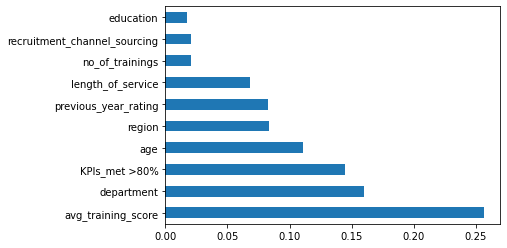

In [123]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier()

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
'''from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)'''

[Text(327.579341255241, 537.5600000000001, 'X[7] <= 0.5\ngini = 0.5\nsamples = 70196\nvalue = [35013, 35183]'),
 Text(37.580145771017, 525.48, 'X[9] <= 0.375\ngini = 0.427\nsamples = 34474\nvalue = [23818, 10656]'),
 Text(6.423173803526448, 513.4, 'X[9] <= 0.308\ngini = 0.133\nsamples = 14940\nvalue = [13866, 1074]'),
 Text(2.508816120906801, 501.32000000000005, 'X[9] <= 0.258\ngini = 0.023\nsamples = 10876\nvalue = [10751, 125]'),
 Text(0.4836272040302267, 489.24, 'X[9] <= 0.242\ngini = 0.001\nsamples = 9372\nvalue = [9366, 6]'),
 Text(0.24181360201511334, 477.16, 'gini = 0.0\nsamples = 8903\nvalue = [8903, 0]'),
 Text(0.72544080604534, 477.16, 'X[5] <= 0.875\ngini = 0.025\nsamples = 469\nvalue = [463, 6]'),
 Text(0.4836272040302267, 465.08000000000004, 'gini = 0.0\nsamples = 411\nvalue = [411, 0]'),
 Text(0.9672544080604534, 465.08000000000004, 'X[2] <= 0.75\ngini = 0.185\nsamples = 58\nvalue = [52, 6]'),
 Text(0.72544080604534, 453.0, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 T

In [122]:
#Hyperparameter tuning for decision tree
params={
 "splitter"    : ["best","random"] ,
    "criterion":['gini','entropy'],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [ ]:

## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

random_search=GridSearchCV(dtree,param_grid=params,scoring='f1_weighted',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

Fitting 5 folds for each of 20480 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

In [124]:
random_search.best_params_

NameError: name 'random_search' is not defined

In [ ]:
random_search.best_score_

RandomForestClassifier(criterion='entropy', max_depth=10)
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     15127
           1       0.75      0.94      0.83     14957

    accuracy                           0.81     30084
   macro avg       0.83      0.81      0.81     30084
weighted avg       0.83      0.81      0.81     30084

[[10386  4741]
 [  920 14037]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80455643 0.79936842 0.80156872 0.80722168 0.79174634 0.79856665
 0.79535547 0.80895822 0.80252133 0.82949408]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

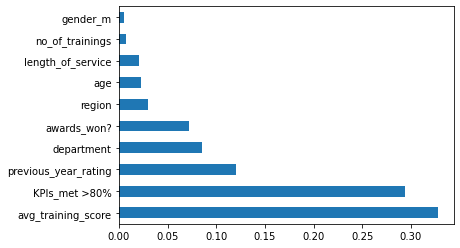

In [142]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
random = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='entropy')


# Printing all the parameters of Random Forest
print(random)

# Creating the model on Training Data
RF=random.fit(X_train,y_train)
prediction_RF=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_RF))
print(metrics.confusion_matrix(y_test, prediction_RF))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_RF, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Plot ROC and compare AUC

In [144]:
from sklearn.metrics import roc_curve, auc
roc_curve(y_test, prediction_RF)

(array([0.       , 0.3134131, 1.       ]),
 array([0.        , 0.93849034, 1.        ]),
 array([2, 1, 0], dtype=int64))

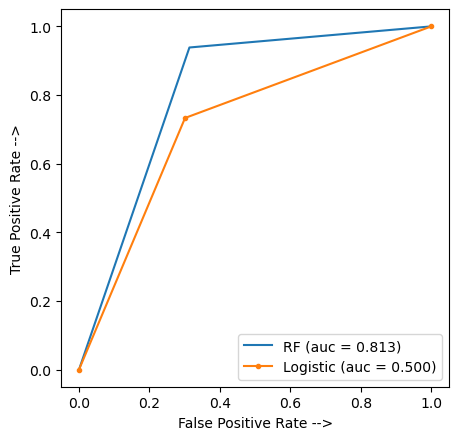

In [145]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_RF)
auc_RF = auc(RF_fpr,RF_tpr)

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, prediction_log)
auc_logistic = auc(logistic_fpr, logistic_fpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RF_fpr, RF_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_RF)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.01, n_estimators=200)
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     15127
           1       0.74      0.94      0.83     14957

    accuracy                           0.80     30084
   macro avg       0.83      0.80      0.80     30084
weighted avg       0.83      0.80      0.80     30084

[[10049  5078]
 [  868 14089]]
Accuracy of the model on Testing Sample Data: 0.8

Accuracy values for 10-fold Cross Validation:
 [0.80678779 0.7961603  0.79770778 0.80583098 0.79467796 0.80112512
 0.79787154 0.80985838 0.80564327 0.82925365]

Final Average Accuracy of the model: 0.8


<AxesSubplot:>

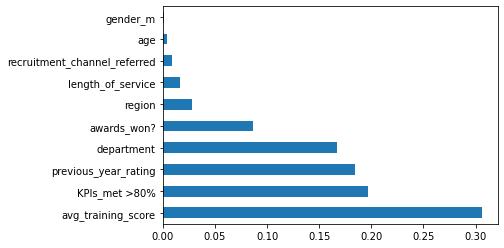

In [123]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
# Choose different values of max_depth, n_estimators and learning_rate to tune the model
DTC=DecisionTreeClassifier(max_depth=4)
clf = AdaBoostClassifier(n_estimators=200, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction_AB=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_AB))
print(metrics.confusion_matrix(y_test, prediction_AB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_AB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

## Xtreme Gradient Boosting (XGBoost)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[22:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.96      0.74      0.83     15127
           1       0.78      0.97      0.87     14957

    accuracy                           0.85     30084
   macro avg       0.87      0.85      0.85     30084
weighted avg       0.87      0.85      0.85     30084

[[11130  3997]
 [  511 14446]]
Accuracy of the model on Testing Sample Data: 0.85
[22:30:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:30:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<AxesSubplot:>

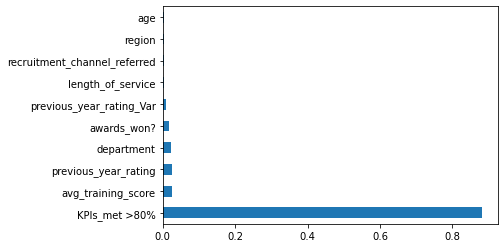

In [148]:
# Xtreme Gradient Boosting (XGBoost)
!pip install xgboost
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction_XGB=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_XGB))
print(metrics.confusion_matrix(y_test, prediction_XGB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_XGB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

#### Hyper Parameter Optimization (XGBoost)

In [274]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost


clf=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

random_search.fit(X,y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   21.8s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   31.3s finished
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:30:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [275]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [276]:
random_search.best_params_


{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [277]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=5, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [278]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:31:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

In [279]:
score

array([0.92859992, 0.92550858, 0.92341444, 0.93109294, 0.92441165,
       0.92780215, 0.92949741, 0.92949741, 0.9261069 , 0.93248903])

In [280]:
score.mean()

0.9278420422816115

array([[0.375     , 0.44667154, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.625     , 0.62172404, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.375     , 0.06172952, 0.5       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.44667154, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.375     , 0.08140809, 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [131]:
XGB=classifier.fit(X_train,y_train)
prediction_XGB=XGB.predict(X_test)

[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

           0       0.98      0.86      0.92     15127
           1       0.87      0.99      0.93     14957

    accuracy                           0.92     30084
   macro avg       0.93      0.92      0.92     30084
weighted avg       0.93      0.92      0.92     30084

[[12971  2156]
 [  211 14746]]
Accuracy of the model on Testing Sample Data: 0.92
[18:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was ch

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip

<AxesSubplot:>

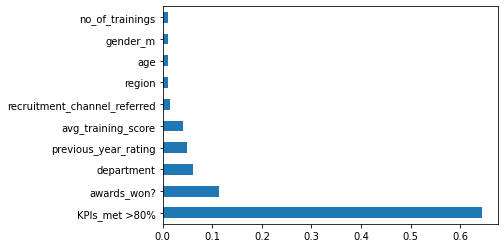

In [132]:
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_XGB))
print(metrics.confusion_matrix(y_test, prediction_XGB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_XGB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

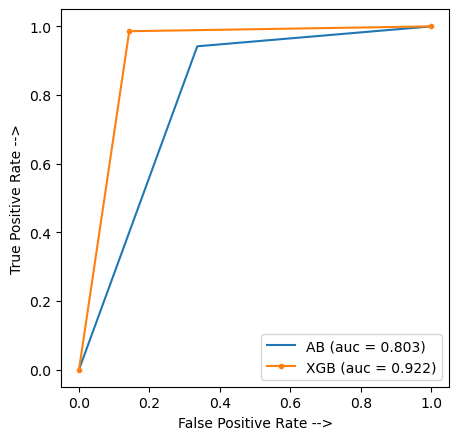

In [135]:
from sklearn.metrics import roc_curve, auc

AB_fpr, AB_tpr, threshold = roc_curve(y_test, prediction_AB)
auc_AB = auc(AB_fpr,AB_tpr)

XGB_fpr, XGB_tpr, threshold = roc_curve(y_test, prediction_XGB)
auc_XGB = auc(XGB_fpr, XGB_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(AB_fpr, AB_tpr, linestyle='-', label='AB (auc = %0.3f)' % auc_AB)
plt.plot(XGB_fpr, XGB_tpr, marker='.', label='XGB (auc = %0.3f)' % auc_XGB)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

## Naive Bayes

In [138]:
X_train.shape
X_test.shape

(30084, 14)

In [136]:
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clfNaive = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clfNaive)

NB=clfNaive.fit(X_train,y_train)
prediction_NB=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction_NB))
print(metrics.confusion_matrix(y_test, prediction_NB))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction_NB, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     15127
           1       0.75      0.46      0.57     14957

    accuracy                           0.66     30084
   macro avg       0.68      0.65      0.64     30084
weighted avg       0.68      0.66      0.64     30084

[[12801  2326]
 [ 8045  6912]]
Accuracy of the model on Testing Sample Data: 0.64

Accuracy values for 10-fold Cross Validation:
 [0.64104712 0.63178069 0.63592839 0.64259877 0.64077165 0.64401401
 0.6463908  0.64319449 0.65095708 0.65354442]

Final Average Accuracy of the model: 0.64


## Getting Test.csv

In [249]:
test=pd.read_csv("E:\\Internship\\test.csv")
print(test.head())
print(test.isnull().sum())


   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

In [250]:
Testdata=test.drop(columns='employee_id',axis=1)
Testdata

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [251]:
Testdata.shape

(23490, 12)

In [252]:
22456+1034

23490

In [253]:
#Keeping Copy of datset for future reference
mainTestData=Testdata.copy()
#Calculation Missing VAlues in indivisual column
Testdata.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [263]:
def testData_MissingValueTreatment(data):
    
    #Simply taking mode for education col won't help as education col data is imbalancly distributed
    data=[i for i in Testdata.columns if i not in ['department','region','previous_year_rating']]
    TestdataForEdu=Testdata[data]
    TestdataForEdu.head()
    TestdataForEdu.shape
    #Getting index of NAN Rows
    nanIndex=TestdataForEdu[TestdataForEdu['education'].isnull()].index.tolist()
    len(nanIndex)
    #Getting data of NAN Rows
    MissingtestData=TestdataForEdu[TestdataForEdu.index.isin(nanIndex)]
    MissingtestData
    totalIndex=TestdataForEdu.index.tolist()
    #Getting Index of rows which does not have NAN value
    notNullIndex=[i for i in totalIndex if i not in nanIndex ]
    len(notNullIndex)
    #Getting all data which have not any missing values
    NotNulltrainData=TestdataForEdu[TestdataForEdu.index.isin(notNullIndex)]
    NotNulltrainData
    X_train=NotNulltrainData.iloc[:,1:]
    X_train.head()
    X_train.shape
    y_train=NotNulltrainData.iloc[:,0]
    y_train.head()
    y_train.shape

    y_train=y_train.replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})
    y_train

    X_train=pd.get_dummies(X_train)
    X_train

    # K-Nearest Neighbor(KNN) for predicting NAN values for Education column
    from sklearn.neighbors import KNeighborsClassifier
    clf = KNeighborsClassifier(n_neighbors=3)

    # Printing all the parameters of KNN
    print(clf)

    # Creating the model on Training Data
    KNN=clf.fit(X_train,y_train)

    TestdataForEdu=MissingtestData.iloc[:,1:]
    TestdataForEdu
    TestdataForEdu1=pd.get_dummies(TestdataForEdu)

    TestdataForEduPred=KNN.predict(TestdataForEdu1).tolist()


    #Storing all NAN predicted Data from KNN Algo
    df_test = pd.DataFrame(TestdataForEduPred, columns = ["education"])
    df_test

    #Converting encoded Value to original Data
    df_test['education']=df_test['education'].replace({3:"Master's & above",2:"Bachelor's",1:'Below Secondary'})
    df_test

    df_test.shape
    #print(TestdataForEdu.shape)

    # CAllung MAin Data which we have copied
    mainTestData
    nanDataForFilter=mainTestData[mainTestData.index.isin(nanIndex)]
    nanDataForFilter
    nanDataForFilter=nanDataForFilter.drop(columns='education',axis=1)
    nanDataForFilter.shape
    #Reseting Index for Adding the NAN Treated data to Not Null Data
    nanDataForFilter=nanDataForFilter.reset_index()

    NanValueData=pd.concat([df_test, nanDataForFilter], axis=1)
    NanValueData=NanValueData.drop(columns='index',axis=1)
    NanValueData.head()
    NanValueData.shape

    NotNullData=mainTestData[mainTestData.index.isin(notNullIndex)]

    '''print(NanValueData.shape)
    print(NotNullData.shape)
    print(mainTestData.shape)
    print(NanValueData.isnull().sum())
    print(NotNullData.isnull().sum())'''

    NanValueData=NanValueData[['department', 'region', 'education', 'gender', 'recruitment_channel',
           'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
           'KPIs_met >80%', 'awards_won?', 'avg_training_score']]

    #Adding The NAN treated Data with Not Null Data
    TestDataSet=NotNullData.append(NanValueData,ignore_index=True)

    TestDataSet.isnull().sum()
    TestDataSet.head()

    #As per looking into distribution for frequency in previous_year_rating var 3.0 , 5.0, 4.0 is frequently given to employees.Choosing one of these using mode could create biasness.
    # So Adding A separate col for weightage given to NAN values would be help full

    TestDataSet['previous_year_rating_Var']=np.where(TestDataSet['previous_year_rating'].isnull(),1,0)

    frequent=TestDataSet['previous_year_rating'].mode()[0]
    TestDataSet['previous_year_rating'].fillna(frequent,inplace=True)
    TestDataSet.isnull().sum()
    return TestDataSet




In [266]:
testData_MissingValueTreatment(test).shape

KNeighborsClassifier(n_neighbors=3)


(23490, 13)

# Deployment of the Model

### Step 1. Retraining the model using 100% data

In [144]:
# XGBoost 
import xgboost
from sklearn.tree import DecisionTreeClassifier

# Using the XGBoost algorithm with final hyperparamters
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=5, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

# Training the model on 100% Data available
FinalXGBModel=classifier.fit(X,y)


[20:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:34:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Step 2. Save the model as a serialized file which can be stored anywhere

In [145]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalXGBModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\user


### Step 3. Create a python functions

In [524]:
# This Function can be called from any from any front end tool/website
def predict_promotion(test):
    DataSet=testData_MissingValueTreatment(test)
    #DepartmentEncoding
    ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
    DataSet['department']=DataSet['department'].map(ordinal_labels2)
    #Count Or Frequency Encoding for region
    region_map=DataSet['region'].value_counts().to_dict()
    DataSet['region']=DataSet['region'].map(region_map)
    #Education Encoding
    DataSet['education']=DataSet['education'].replace({"Master's & above":3,"Bachelor's":2,'Below Secondary':1})
    #Avoidng Dumy Trap for applying Drop First
    DataSet=pd.get_dummies(DataSet,drop_first=True)
    # Maintaining the same order of columns as it was during the model training
    Predictors=['department', 'region', 'education', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'previous_year_rating_Var', 'gender_m', 'recruitment_channel_referred', 'recruitment_channel_sourcing']
    X=DataSet[Predictors].values
    X=PredictorScalerFit.transform(X)
    # Loading the Function from pickle file
    import pickle
    with open('FinalXGBModel.pkl', 'rb') as fileReadStream:
        XGB_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
        
    # Genrating Predictions
    Prediction=XGB_model.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    
    return(PredictedStatus)

    
    
    
    


In [530]:
predict_promotion(test)

KNeighborsClassifier(n_neighbors=3)


,Predicted Status
0,0
1,0
2,0
3,0
4,0
...,...
23485,0
23486,1
23487,1
23488,0


In [537]:
predictedDPromotion_Status=predict_promotion(test)

KNeighborsClassifier(n_neighbors=3)


In [538]:
print(test.shape)
print(predictedDtatus.shape)

(23490, 13)
(23490, 1)


In [541]:
PredictedTestDataframe=pd.concat([test,predictedDPromotion_Status],axis=1)

In [543]:
PredictedTestDataframe.to_csv('PredictedTestDataResult_Promotion.csv')